<a href="https://colab.research.google.com/github/MusserO/Kollotin/blob/main/Kollotin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esittely**

Tämä verkkosivu toimii työkaluna tutkijoille ja opinnäytetyön tekijöille, jotka haluavat tehdä korpustutkimusta analysoimalla kollokaatteja tilastollisten testien avulla. Kollotin-työkalun avulla tutkijat voivat hakea valitsemiensa sanojen tai ilmausten kollokaateille MI- ja t-testien arvot sekä ladata ne omalle tietokoneelleen esimerkiksi laadullista analyysiä varten. Kollotin-työkalulla tehtävässä kollokaatioanalyysissä hyödynnetään Kielipankin Korp-työkalua (Borin, Forsberg & Roxendal 2012) sekä Hämäläisen (2018) Python-Korp-kirjastoa.

# **Käyttöohjeet**

**Aineiston valitseminen**

1) Avaa internet-selaimessasi Korp-työkalun verkkosivu https://www.kielipankki.fi/korp/.

2) Klikkaa sivun yläreunan korpusvalikosta valituiksi ne korpukset, joista haluat aineistosi koostuvan.

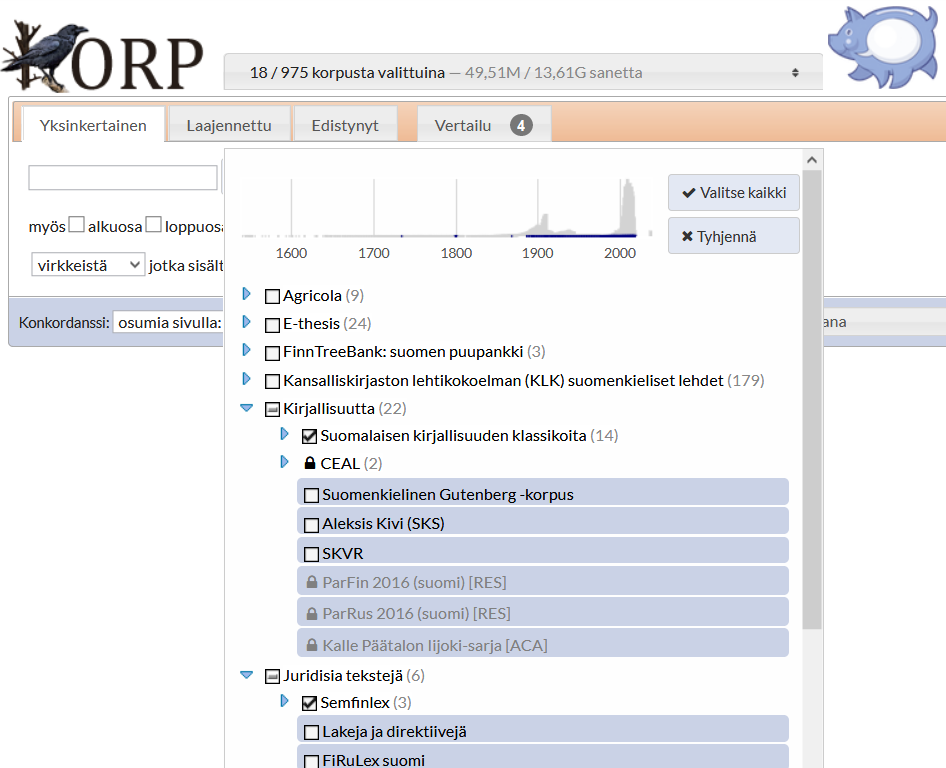

3) Kopioi internet-selaimesi hakukentän URL-osoitteesta se tekstinosa, jonka edellä lukee *corpus=*.

4) Liitä kopioimasi tekstinosa Kollotin-työkalun koodiin  lainausmerkkien sisälle muuttujaan *corpora*.

ESIMERKKI

Jos haluat käyttää analyysisi aineistona *Suomalaisen kirjallisuuden klassikoita* -korpuskokoelmaa sekä *Semfinlex*-korpuskokoelmaa, koodissa käytettävän muuttujan *corpora* rivin tulee näyttää tältä (koko teksti kuitenkin yhdelle ja samalle riville):

> corpora = "skk_aho,skk_canth,skk_finne,skk_jarnefelt,skk_kailas,skk_lassila,skk_linnankoski,skk_kramsu,skk_lehtonen,skk_leino,skk_pakkala,skk_siljo,skk_sodergran,skk_wilkuna,semfinlex_asd_fi_2018,semfinlex_kko_fi_2018,semfinlex_kho_fi_2018"

**Hakulausekkeen määrittäminen**

Määritä, minkä sanan tai sanojen kollokaatteja haluat tarkastella valitsemassasi aineistossa. Merkitse sana(t) kohtaan *query* juuri siinä muodossa tai niissä muodoissa, jotka haluat ottaa mukaan analyysisi tuloksiin. Lisää apua hakusanojen räätälöimiseen voi etsiä CQP-ohjeesta (Sourceforge 2020) tai hakemalla verkosta tietoa regex-lausekkeista.

ESIMERKKI 1: noodina yksi sana

Jos haluat tarkastella analyysissäsi sananmuodon *lapsuudessani* kollokaatteja, rivin tulee näyttää tältä:

> query = "[word='(?i)lapsuudessani']"

Merkinnän *(?i)* merkitys on, että hakusanan kirjainkoolla ei ole merkitystä analyysissä.

Jos haluat sen sijaan ottaa analyysissäsi huomioon sanan *lapsuus* kaikkien sananmuotojen kollokaatit, kirjoita sanan *word* tilalle *lemma*:

> query = "[lemma='lapsuus']"

ESIMERKKI 2: noodina useampi kuin yksi sana

Jos haluat tarkastella analyysissäsi ilmauksen *itse asiassa* kollokaatteja, rivin tulee näyttää tältä:

> query = "[word='(?i)itse'] [word='(?i)asiassa']"

Jos haluat ottaa analyysissäsi huomioon myös ne virkkeet, joissa noodina käytettävän sanan perässä on liitteitä, voit määrittää hakulausekkeen päätteen sellaiseksi, että kirjoittamasi hakusanan päätteeksi voi vielä tulla mitä tahansa suomen kielen aakkosiin kuuluvia kirjaimia tai yhdysviivoja. Tällöin analyysiin lasketaan mukaan myös esimerkiksi muodot *itse asiassahan* ja *itse asiassakin*:

> query = "[word='(?i)itse'] [word='(?i)asiassa[a-zåäö\\-]*']"

Jos sen sijaan ei haluta hakea tiettyjä sananmuotoja, vaan kaikkia mahdollisia kyseisten lekseemien muotoja, tulee sana *word* korvata sanalla *lemma*. Tällöin konkordanssiriveiksi lasketaan kaikki aineiston virkkeet, joissa esiintyy peräkkäin mitkä tahansa muodot sanoista *itse* ja *asia*. Tällöin analyysiin lasketaan mukaan myös esimerkiksi muotojen *itsekin asian* ja *itseään asian* kollokaatit:

> query = "[lemma='itse'] [lemma='asia']"

**Kollokaatiovälin määrittäminen**

Määritä, kuinka kaukana noodista sane voi kauimmillaan esiintyä, niin että se lasketaan vielä kollokaatiksi. Merkitse tämä tieto muuttujiin *collocate_window_span_left* ja *collocate_window_span_right* (vasen ja oikea konteksti erikseen – luvut voivat olla keskenään samat tai poiketa toisistaan).

Jos esimerkiksi haluat huomioida analyysissäsi vain ne kollokaatit, jotka esiintyvät aineistossa enintään neljän sanan päässä noodin vasemmalla puolella tai neljän sanan päässä noodin oikealla puolella, rivien tulee näyttää tältä:

> collocate_window_span_left = 4

> collocate_window_span_right = 4

**Kollokaattiesiintymien raja-arvon määrittäminen**

Määritä, kuinka monta kertaa kunkin lekseemin tulee vähintään esiintyä aineistossa, jotta lekseemi otetaan huomioon analyysissä. Merkitse tämä raja-arvo numeroina muuttujaan *min_collocate_appearance_count*.

Jos esimerkiksi haluat huomioida analyysissäsi vain ne sanat, jotka esiintyvät asettamasi noodin kollokaattina vähintään 5 kertaa, rivin tulee näyttää tältä:

> min_collocate_appearance_count = 5

**Muutosten tallentaminen kopiona Driveen**

Voit tallentaa koodiin (mm. hakulausekkeeseen) tekemäsi muutokset kopiona omaan Drive-kansioosi Tallenna-toiminnolla (*Ctrl+S*).

**Tiedoston ajaminen**

1) Klikkaa sivun yläreunasta kohtaa *Suorituspalvelu*.

2) Klikkaa kohdasta *Suorita kaikki* (*Ctrl+F9*).

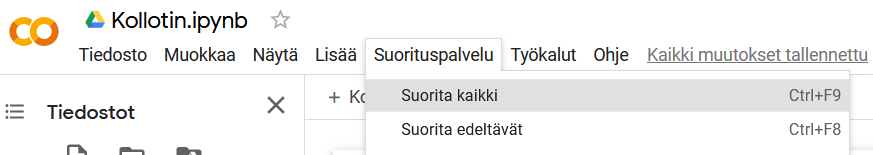

3) Odota, että tiedosto on ajettu loppuun saakka ja sivun alimmalle riville ilmestyy ilmoitus: "Tiedosto on nyt ajettu loppuun saakka..." Tiedoston ajaminen voi kestää muutamista sekunneista muutamaan tuntiin – riippuen aineiston koosta.

**Tulosten tallentaminen tekstitiedostoina omalle tietokoneelle**

Kun tiedosto on ajettu loppuun saakka, tallenna omalle tietokoneellesi tilastollisten testien tulokset, luettelo poistetuista duplikaattivirkkeistä sekä konkordanssikorpus:

1) Klikkaa sivun vasemmassa reunassa näkyvää kansion kuvaa. Sivun vasempaan reunaan aukeaa tällöin Tiedostot-palkki.

2) Klikkaa tekstitiedostoja hiiren oikeanpuoleisella painikkeella ja valitse *Lataa*.

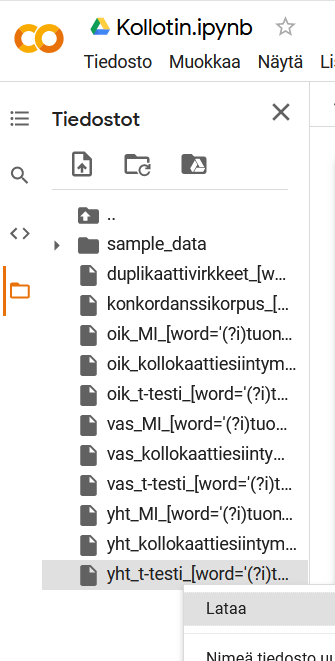

**Tekstitiedostojen sisällöt**

*Konkordanssikorpus*-alkuinen tekstitiedosto sisältää jokaisen hakulausekkeellasi löytyneen konkordanssiosuman omalle rivilleen kirjoitettuna, niin että noodi on erotettu molemmin puolin kahdella yhdysviivalla. Jokaisen konkordanssirivin alla on lisäksi sama lause lemmatisoituna. Voit etsiä haluamiasi sanoja konkordanssikorpuksesta kätevästi esimerkiksi Muistion Etsi-toiminnon avulla (*Ctrl+F*).

*Duplikaattivirkkeet*-alkuinen tekstitiedosto sisältää kaikki konkordanssiosumat, jotka esiintyvät aineistossa täsmälleen samanlaisena useammin kuin yhden kerran. Jokaisen konkordanssirivin alla on saman virkkeen lemmatisoitu versio. Lemmatisoidun virkkeen alla on puolestaan luku, joka kertoo, montako kyseisen virkkeen duplikaattia on poistettu aineistosta.

*Yht_MI*- ja *yht_t-testi*-alkuiset tekstitiedostot sisältävät MI- ja t-testien tulokset kullekin kollokaattina esiintyvälle lekseemille, joka täyttää hakuehdot (kollokaatioväli, kollokaattiesiintymien raja-arvo). Tiedostoissa on keskenään samat tiedot, mutta MI-tiedoston sanat on järjestetty MI-arvon mukaan ja t-testi-tiedoston sanat t-arvon mukaan. Molempien tiedostojen ensimmäisessä sarakkeessa on kollokaatti lemmamuodossa, toisessa sarakkeessa kollokaattiesiintymien lukumäärä, kolmannessa sarakkeessa on kyseisen lekseemin esiintymien lukumäärä koko aineistossa (muutkin kuin kollokaattiesiintymät), neljännessä sarakkeessa on kyseisen lekseemin t-testin arvo, ja viidennessä sarakkeessa on kyseisen lekseemin MI-arvo. Myös *vas_MI*-, *vas_t-testi*-, *oik_MI*- ja *oik_t-testi*-alkuiset tiedostot on koottu ja järjestetty vastaavalla tavalla.

*Yht_kollokaattiesiintymien_lukumäärät*-, *vas_kollokaattiesiintymien_lukumäärät*- ja *oik_kollokaattiesiintymien_lukumäärät*-alkuiset tiedostot sisältävät jokaisen kollokaattina esiintyvän lekseemin lemmamuodossa sekä esiintymien lukumäärän.

**Tiedot saneiden ja konkordanssiosumien määristä**

Tiedoston ajamisen jälkeen voit myös lukea koodien väleihin ilmestyvistä tulostuksista, kuinka monta konkordanssiosumaa aineistosta löytyi käyttämälläsi hakulausekkeella sekä kuinka monta sanetta aineistossa on yhteensä. Lisäksi näet, kuinka monta konkordanssiosumaa ja sanetta jätettiin analyysissä huomioimatta duplikaattivirkkeiden vuoksi.

**Huom.** Kollotin-työkalulla tehdyssä kollokaatioanalyysissä hylätään sanaluokka-annotaatiotietojen perusteella ne saneet, jotka ovat välimerkkejä, erikoismerkkejä tai tuntemattoman sanaluokan saneita. Tämän vuoksi myöskään konkordanssikorpus ei sisällä esimerkiksi pisteitä ja muita välimerkkejä. Tieteellisissä artikkeleissa ja opinnäytetöissä esiteltäviä konkordanssiesimerkkejä varten on siis tarpeen etsiä kyseinen virke käyttämästäsi aineistosta Korp-työkalun avulla (https://www.kielipankki.fi/korp/).

# **Huomioita duplikaattivirkkeistä**

Kollotin-työkalun avulla tehtävässä kollokaatioanalyysissä aineistosta poistetaan ne duplikaattivirkkeet¹, joissa hakulausekkeeseen määrtetty sana tai ilmaus esiintyy. Näin vältetään se, että joidenkin kollokaattien esiintymien lukumäärät ja tilastollisten testien arvot olisivat korpusten kokoamisessa syntyneiden duplikaattivirkkeiden vuoksi poikkeuksellisen korkeat. Duplikaattivirkkeet eivät siis pääse vääristämään kollokaattien esiintymien lukumääriä suuremmiksi. Tietoteknisisten rajoitteiden vuoksi muualla kuin konkordanssiriveillä esiintyviä duplikaattivirkkeitä ei kuitenkaan poisteta. Tämän vuoksi duplikaattivirkkeiden esiintyminen voi laskea joidenkin kollokaattien tilastollisten testien arvoja hieman.

¹ Duplikaattivirkkeellä tarkoitetaan tässä virkettä, joka esiintyy aineistossa täsmälleen samanlaisena useamman kuin yhden kerran. Esimerkiksi Suomi24-korpuksessa on duplikaattivirkkeitä erityisesti sen takia, että keskustelupalstan teknisten ominaisuuksien vuoksi sama viesti saattaa toistua aineistossa silloin, kun siihen vastataan. Duplikaattivirkkeiden poistamisen lievänä haittana on se, että joissakin tapauksissa duplikaattivirkkeen esiintyminen ei johdu tietoteknisistä seikoista, vaan tietty virke on kirjoitettu aineiston teksteissä sattumalta täsmälleen samanlaisena useamman kerran, jolloin se olisi syytä laskea analyysiin mukaan.

# **Viittaukset**

Borin, Lars, Forsberg, Markus & Roxendal, Johan 2012: *Korp – the corpus infrastructure of Språkbanken*. *Proceedings of LREC 2012*. Istanbul: ELRA. – *http://www.lrec-conf.org/proceedings/lrec2012/pdf/248_Paper.pdf* 27.1.2021.


Hämäläinen, Mika 2018: *Python-Korp*. Zenodo. http://doi.org/10.5281/zenodo.1143374 - *https://github.com/mikahama/python-korp/* 27.1.2021.

Sourceforge 2020: *The IMS Open Corpus Workbench (CWB). CQP Query Language Tutorial*. – *http://cwb.sourceforge.net/files/CQP_Tutorial.pdf* 27.1.2021.

# **Tähän sivuun tai työkaluun viittaaminen**

Jos hyödynnät tällä sivulla esitettyä tietoa tai Kollotin-työkalua tieteellisessä julkaisusssasi, voit viitata näin:
Kumpulainen, Iiro & Kumpulainen, Aaro 2021: *Kollotin*. Zenodo. http://doi.org/10.5281/zenodo.14046860

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.14046860.svg)](https://doi.org/10.5281/zenodo.14046860)

# **Lisenssi**

Apache License 2.0 (C) 2021-2024 Iiro Kumpulainen & Aaro Kumpulainen

In [1]:
corpora = "skk_aho,skk_canth,skk_finne,skk_jarnefelt,skk_kailas,skk_lassila,skk_linnankoski,skk_kramsu,skk_lehtonen,skk_leino,skk_pakkala,skk_siljo,skk_sodergran,skk_wilkuna,semfinlex_asd_fi_2018,semfinlex_kko_fi_2018,semfinlex_kho_fi_2018"

query = "[lemma='lapsuus']"

collocate_window_span_left = 4
collocate_window_span_right = 4

min_collocate_appearance_count = 5

In [2]:
#@title
!pip install korp

In [3]:
#@title
from korp.korp import Korp
from collections import Counter
from datetime import datetime

korp = Korp(url="https://www.kielipankki.fi/korp/api8")

contexts = set()
duplicates = Counter()
corpora_list = corpora.split(",")
n_total_concordances = 0

print("Haetaan konkordansseja...")
for corpus in corpora_list:
    n_concordances, concordances = korp.all_concordances(query, [corpus],
                additional_parameters={"groupby":"lemma", "group_by":"lemma",
                                    "show":["word", "lemma", "pos"],
                                    "sort":"left",
                                    "defaultcontext":"sentence", "default_context":"sentence"})
    n_total_concordances += n_concordances
    print(corpus,"- konkordansseja:",n_concordances)
    for concordance in concordances:
        match_indices = range(concordance['match']['start'], concordance['match']['end'])
        match = " ".join([concordance['tokens'][match_index]['word'] for match_index in match_indices])
        left_collocate_lemmas = []
        right_collocate_lemmas = []
        left_collocate_words = []
        right_collocate_words = []
        for token_index, token in enumerate(concordance['tokens']):
            # Hylätään tulos, jos tietoa sanojen lemmoista tai sanaluokista ei ole saatavilla
            if not 'lemma' in token or not 'pos' in token:
                continue
            # Poistetaan välimerkit, erikoismerkit ja tuntemattoman sanaluokan saneet
            if token['pos'] in ["Punct","Symb","Foreign", None]:
                continue
            if token_index < match_indices[0]:
                left_collocate_lemmas.append(token['lemma'])
                left_collocate_words.append(token['word'])
            elif token_index >= match_indices[-1]+1:
                right_collocate_lemmas.append(token['lemma'])
                right_collocate_words.append(token['word'])
        context = (tuple(left_collocate_lemmas), tuple(right_collocate_lemmas), match,
                        tuple(left_collocate_words), tuple(right_collocate_words))
        if context in contexts:
            duplicates[context] += 1
        else:
            contexts.add(context)

print("Konkordanssit haettu.")
print("Konkordansseja yhteensä:", n_total_concordances)
print("Duplikaatteina poistettuja:", sum(duplicates.values()))

left_collocate_counts = Counter()
right_collocate_counts = Counter()
total_collocate_counts = Counter()
for left, right, _, _, _ in contexts:
    left_collocates = left[-collocate_window_span_left:]
    right_collocates = right[:collocate_window_span_right]
    for lemma in left_collocates:
        left_collocate_counts[lemma] += 1
        total_collocate_counts[lemma] += 1
    for lemma in right_collocates:
        right_collocate_counts[lemma] += 1
        total_collocate_counts[lemma] += 1

with open('vas_kollokaattiesiintymien_lukumäärät_'+query+'.txt',"w+", encoding="utf-8") as file:
    for lemma, count in sorted(left_collocate_counts.items(), key=lambda x: (x[1], x[0]), reverse=True):
        file.write("{}\t{}\n".format(lemma, count))
with open('oik_kollokaattiesiintymien_lukumäärät_'+query+'.txt',"w+", encoding="utf-8") as file:
    for lemma, count in sorted(right_collocate_counts.items(), key=lambda x: (x[1], x[0]), reverse=True):
        file.write("{}\t{}\n".format(lemma, count))
with open('yht_kollokaattiesiintymien_lukumäärät_'+query+'.txt',"w+", encoding="utf-8") as file:
    for lemma, count in sorted(total_collocate_counts.items(), key=lambda x: (x[1], x[0]), reverse=True):
        file.write("{}\t{}\n".format(lemma, count))

Haetaan konkordansseja...
skk_aho - konkordansseja: 1
skk_canth - konkordansseja: 11
skk_finne - konkordansseja: 0
skk_jarnefelt - konkordansseja: 44
skk_kailas - konkordansseja: 10
skk_lassila - konkordansseja: 3
skk_linnankoski - konkordansseja: 1
skk_kramsu - konkordansseja: 1
skk_lehtonen - konkordansseja: 0
skk_leino - konkordansseja: 19
skk_pakkala - konkordansseja: 15
skk_siljo - konkordansseja: 0
skk_sodergran - konkordansseja: 3
skk_wilkuna - konkordansseja: 2
semfinlex_asd_fi_2018 - konkordansseja: 0
semfinlex_kko_fi_2018 - konkordansseja: 28
semfinlex_kho_fi_2018 - konkordansseja: 47
Konkordanssit haettu.
Konkordansseja yhteensä: 185
Duplikaatteina poistettuja: 13


In [4]:
#@title
# Tallennetaan konkordanssit tiedostoon
with open("konkordanssikorpus_"+query+".txt", "w+", encoding="utf-8") as file:
    for left_lemmas, right_lemmas, match, left_words, right_words in list(contexts):
        concordance = " ".join(left_words)+" -- "+match+" -- "+" ".join(right_words)+"\n"+\
            " ".join(left_lemmas)+" -- "+match+" -- "+" ".join(right_lemmas)+"\n"
        file.write(concordance+"\n")

# Tallennetaan duplikaatit tiedostoon
with open("duplikaattivirkkeet_"+query+".txt", "w+", encoding="utf-8") as file:
    for context, count in duplicates.items():
        left_lemmas, right_lemmas, match, left_words, right_words = context
        concordance = " ".join(left_words)+" -- "+match+" -- "+" ".join(right_words)+"\n"+\
            " ".join(left_lemmas)+" -- "+match+" -- "+" ".join(right_lemmas)+"\n"+str(count)+"\n"
        file.write(concordance+"\n")

In [5]:
#@title
print("Lasketaan saneita...")

# Lasketaan yhteen korpusten saneiden lukumäärät
n_all_tokens = 0
old_korp = Korp(url="https://www.kielipankki.fi/korp/cgi-bin/korp/korp.cgi")
corpus_info = old_korp.corpus_information(corpora_list)
for corpus in corpus_info:
    n_all_tokens += int(corpus_info[corpus]['info']['Size'])

# Lasketaan saneet, jotka eivät ole välimerkkejä, erikoismerkkejä eikä tuntemattoman sanaluokan saneita
query_for_included_tokens = '[(pos="[A-Za-z].*")&(pos!="Punct|Symb|Foreign")]'
n_corpus_parts = len(corpora_list)
chunk_size = int((len(corpora_list)+n_corpus_parts-1)/n_corpus_parts)
n_included_tokens_total = 0
corpus_token_counts = dict()
for i, corpus in enumerate(corpora_list):
    n_included_tokens, _ = korp.concordance(query_for_included_tokens, [corpus],
                            additional_parameters={"end":0})
    corpus_token_counts[corpus] = n_included_tokens
    n_included_tokens_total += n_included_tokens
    print("\r"+corpus, "-", i+1,"/",n_corpus_parts,"-",n_included_tokens,end="")
print()

# Lasketaan konkordanssihaun duplikaatteina poistettujen virkkeiden saneet ja lemmojen esiintymät
n_duplicate_tokens = 0
duplicate_lemma_counts = Counter()
processed_duplicates = set()
for duplicate, count in duplicates.items():
    left_lemmas, right_lemmas, match, left_words, right_words = duplicate
    duplicate_sentence = left_words + tuple([match]) + right_words
    if duplicate_sentence in processed_duplicates:
        continue
    processed_duplicates.add(duplicate_sentence)
    n_duplicate_tokens += (len(left_lemmas)+len(match.split(" "))+len(right_lemmas))*count
    for lemma in left_lemmas + right_lemmas:
        duplicate_lemma_counts[lemma] += count

n_tokens = n_included_tokens_total - n_duplicate_tokens
print("Saneet laskettu.")
print("Saneita yhteensä:",n_all_tokens)
print("Saneita, joilla on annotoitu sanaluokka ja jotka eivät ole välimerkkejä,",
      "erikoismerkkejä eivätkä tuntemattoman sanaluokan saneita:", n_included_tokens_total)
print("Konkordanssihaun duplikaattivirkkeiden saneita:",n_duplicate_tokens)
print("Saneita näiden poistamisen jälkeen:",n_tokens)

Lasketaan saneita...
semfinlex_kho_fi_2018 - 17 / 17 - 9125477
Saneet laskettu.
Saneita yhteensä: 49512395
Saneita, joilla on annotoitu sanaluokka ja jotka eivät ole välimerkkejä, erikoismerkkejä eivätkä tuntemattoman sanaluokan saneita: 42581141
Konkordanssihaun duplikaattivirkkeiden saneita: 308
Saneita näiden poistamisen jälkeen: 42580833


In [6]:
#@title
import re
from korp.korp import KorpQueryError
from requests.exceptions import ChunkedEncodingError
from json.decoder import JSONDecodeError

print("Lasketaan jokaiselle vähintään", min_collocate_appearance_count,
      "kertaa kollokaattina esiintyvälle sanalle, kuinka monta kertaa se esiintyy koko aineistossa...")
collocate_lemmas = [lemma for lemma, count in total_collocate_counts.items() \
                    if count >= min_collocate_appearance_count]

start_time = datetime.now()
lemma_total_counts = Counter()
processed_tokens = 0
partition_size = 2048
lemma_strings = []
for i_partition in range(0, len(collocate_lemmas), partition_size):
    collocate_lemma_partition = collocate_lemmas[i_partition:(i_partition+partition_size)]
    lemma_string = '|'.join([re.escape(lemma).replace('"', '\\"') for lemma in collocate_lemma_partition])
    lemma_strings.append(lemma_string)

progress_printed = False
prev_i_lemma_string = 0
for corpus_index in range(len(corpora_list)):
    corpus = corpora_list[corpus_index]
    if corpus_token_counts[corpus] == 0:
        continue
    i_lemma_string = 0
    while(i_lemma_string < len(lemma_strings)):
        lemma_string = lemma_strings[i_lemma_string]
        query_for_lemma_counts = '[lemma="('+lemma_string+')"]'
        try:
            lemma_count_query_result = korp.statistics(query_for_lemma_counts, [corpus], groupby="lemma", additional_parameters={"group_by":"lemma"})
        except (KorpQueryError, ChunkedEncodingError, JSONDecodeError) as e:
            # Jos haussa tapahtuu virhe, yritetään uudelleen jakamalla haku pienempiin osiin
            query_success = False
            lemmas = re.split(r'(?<!\\)\|', lemma_string)
            if len(lemmas) == 1:
                raise e
            lemma_string_halves = ['|'.join(lemmas[:len(lemmas)//2]),
                                   '|'.join(lemmas[len(lemmas)//2:])]
            lemma_strings = lemma_strings[:i_lemma_string] + lemma_string_halves + lemma_strings[i_lemma_string+1:]
            if progress_printed:
                print()
                print("Tapahtui virhe tulosten hakemisessa.")
                print("Yritetään uudelleen jakamalla haku pienempiin osiin...")
                print()
                progress_printed = False
            continue
        for row in lemma_count_query_result[corpus.upper()]['rows']:
            lemma = row['value']['lemma'][0]
            count = row['absolute']
            lemma_total_counts[lemma] += count
        corpus_tokens_processed = (i_lemma_string+1) * (corpus_token_counts[corpus] // len(lemma_strings))
        if i_lemma_string == len(lemma_strings)-1:
            processed_tokens += corpus_token_counts[corpus]
            corpus_tokens_processed = 0
        completed_fraction = (processed_tokens+corpus_tokens_processed)/n_included_tokens_total
        if len(lemma_strings) > 1:
            print("\r", i_lemma_string+1, "/", len(lemma_strings), corpus, corpus_index+1, "/", len(corpora_list),"-",
                "{:.2f} %".format(100*completed_fraction), end="")
        elif len(corpora_list) > 1:
            print("\r" + corpus, corpus_index+1, "/", len(corpora_list),"-",
                "{:.2f} %".format(100*completed_fraction), end="")
        progress_printed = True
        i_lemma_string += 1
print()
print("Suorituksen kesto:",datetime.now()-start_time)

Lasketaan jokaiselle vähintään 5 kertaa kollokaattina esiintyvälle sanalle, kuinka monta kertaa se esiintyy koko aineistossa...
semfinlex_kho_fi_2018 17 / 17 - 100.00 %
Suorituksen kesto: 0:00:22.748437


In [7]:
#@title
# Poistetaan lemmojen laskuista konkordanssihaun duplikaattilauseiden lemmat
for lemma in collocate_lemmas:
    lemma_total_counts[lemma] -= duplicate_lemma_counts[lemma]

In [8]:
#@title
import math
for context in ["vas", "oik", "yht"]:
    collocate_counts = Counter()
    with open(context+'_kollokaattiesiintymien_lukumäärät_'+query+'.txt',"r", encoding="utf-8") as file:
        for line in file.read().split("\n")[:-1]:
            lemma, count = line.split("\t")
            collocate_counts[lemma] += int(count)

    n_collocate_words = sum(collocate_counts.values())

    t_test_scores = dict()
    MI_scores = dict()
    for lemma in collocate_lemmas:
        if collocate_counts[lemma] == 0:
            t_test_scores[lemma] = float('-inf')
            MI_scores[lemma] = float('-inf')
        else:
            # Lasketaan t-testin arvo ja MI-arvo
            t_test_mean = collocate_counts[lemma]/n_tokens
            t_test_variance = t_test_mean*(1-t_test_mean)
            t_test_expected_mean = (lemma_total_counts[lemma] / n_tokens) * (n_collocate_words / n_tokens)
            t_test_scores[lemma] = (t_test_mean - t_test_expected_mean)/math.sqrt(t_test_variance/n_tokens)
            MI_scores[lemma] = math.log((n_tokens*collocate_counts[lemma]/\
                                        (n_collocate_words*lemma_total_counts[lemma])),2)

    # Tallennetaan tulokset tiedostoihin
    with open(context+'_t-testi_'+query+'.txt',"w+", encoding="utf-8") as file:
        for lemma in sorted(collocate_lemmas,
                key=lambda x: (t_test_scores[x], collocate_counts[x], x), reverse=True):
            file.write("{}\t{}\t{}\t{}\t{}\n".format(lemma, collocate_counts[lemma],
                                lemma_total_counts[lemma], t_test_scores[lemma], MI_scores[lemma]))
    with open(context+'_MI_'+query+'.txt',"w+", encoding="utf-8") as file:
        for lemma in sorted(collocate_lemmas,
                key=lambda x: (MI_scores[x], collocate_counts[x], x), reverse=True):
            file.write("{}\t{}\t{}\t{}\t{}\n".format(lemma, collocate_counts[lemma],
                                lemma_total_counts[lemma], t_test_scores[lemma], MI_scores[lemma]))


In [9]:
#@title
print("Tiedosto on nyt ajettu loppuun saakka. Tulokset ovat ladattavissa tekstitiedostoina sivun vasemmassa reunassa olevasta Tiedostot-kansiosta.")

Tiedosto on nyt ajettu loppuun saakka. Tulokset ovat ladattavissa tekstitiedostoina sivun vasemmassa reunassa olevasta Tiedostot-kansiosta.
